In [1]:
#Data Preprocessing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('titanic3.csv')
df.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [2]:
#number of rows and columes of titanic3
df.shape

(1310, 14)

In [3]:
#the type of each feature
df.dtypes

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [4]:
#for each feacher number de zeros that has
null_summary = df.isna().sum().sort_values()
print("Summary of null values in each column:")
null_summary=null_summary[null_summary>0]
null_summary



Summary of null values in each column:


pclass          1
survived        1
name            1
sex             1
sibsp           1
parch           1
ticket          1
fare            2
embarked        3
age           264
home.dest     565
boat          824
cabin        1015
body         1189
dtype: int64

<Axes: >

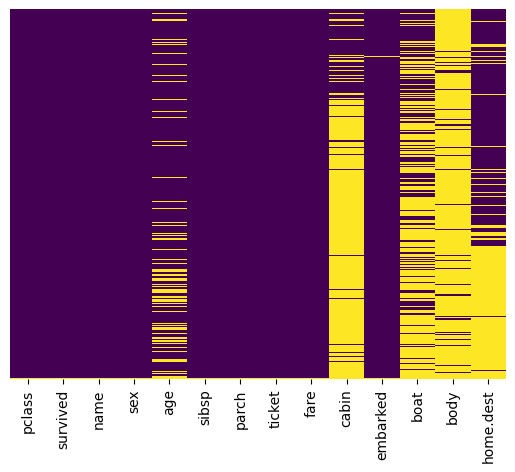

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
# Calculate the proportion of missing values
total_rows = len(df)
null_proportion = null_summary / total_rows
print("Proportion of null values in each column:")
print(null_proportion)

Proportion of null values in each column:
pclass       0.000763
survived     0.000763
name         0.000763
sex          0.000763
sibsp        0.000763
parch        0.000763
ticket       0.000763
fare         0.001527
embarked     0.002290
age          0.201527
home.dest    0.431298
boat         0.629008
cabin        0.774809
body         0.907634
dtype: float64


In [7]:
# Set a threshold for maximum acceptable proportion of missing values
threshold = 0.5  # 50%

# Identify columns to drop based on the threshold
columns_to_drop = null_proportion[null_proportion > threshold].index
# Drop identified columns
df_1 = df.drop(columns=columns_to_drop)
print("Columns dropped:", list(columns_to_drop))



Columns dropped: ['boat', 'cabin', 'body']


In [8]:
print("DataFrame after dropping columns with too many null values:")
print(df_1.head(6))


DataFrame after dropping columns with too many null values:
   pclass  survived                                             name     sex  \
0     1.0       1.0                    Allen, Miss. Elisabeth Walton  female   
1     1.0       1.0                   Allison, Master. Hudson Trevor    male   
2     1.0       0.0                     Allison, Miss. Helen Loraine  female   
3     1.0       0.0             Allison, Mr. Hudson Joshua Creighton    male   
4     1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   
5     1.0       1.0                              Anderson, Mr. Harry    male   

       age  sibsp  parch  ticket      fare embarked  \
0  29.0000    0.0    0.0   24160  211.3375        S   
1   0.9167    1.0    2.0  113781  151.5500        S   
2   2.0000    1.0    2.0  113781  151.5500        S   
3  30.0000    1.0    2.0  113781  151.5500        S   
4  25.0000    1.0    2.0  113781  151.5500        S   
5  48.0000    0.0    0.0   19952   26.5500       

In [9]:
# Fill null values with mean values
df_1['fare'].fillna( df_1['fare'].mean(), inplace=True)
df_1['age'].fillna(df_1['age'].mean(), inplace=True)


In [10]:
# For categorical columns like embarked , fill with most frequent value
most_freq_embarked = df_1['embarked'].mode()[0]
df_1['embarked'].fillna(most_freq_embarked, inplace=True)


In [11]:
# Drop the 'home.dest' column
df_1 = df_1.drop(columns=['home.dest'])

In [12]:
df_1.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S


In [13]:
columns_to_fill = ['pclass', 'survived', 'name', 'sex', 'sibsp', 'parch', 'ticket', 'fare', 'embarked', 'age']

for col in columns_to_fill:
    if df_1[col].isnull().sum() == 1:
        if pd.api.types.is_numeric_dtype(df_1[col]):
            # Fill numeric column with mean
            mean_value = df_1[col].mean()
            df_1[col].fillna(mean_value, inplace=True)
        else:
            # Fill non-numeric column with most frequent value
            most_freq_value = df_1[col].mode()[0]
            df_1[col].fillna(most_freq_value, inplace=True)

# Display the DataFrame after filling null values
print("DataFrame after filling null values:")
df_1.head(5)

DataFrame after filling null values:


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S


In [14]:
df_1.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S


In [15]:
df_1.isna().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

<Axes: xlabel='survived', ylabel='count'>

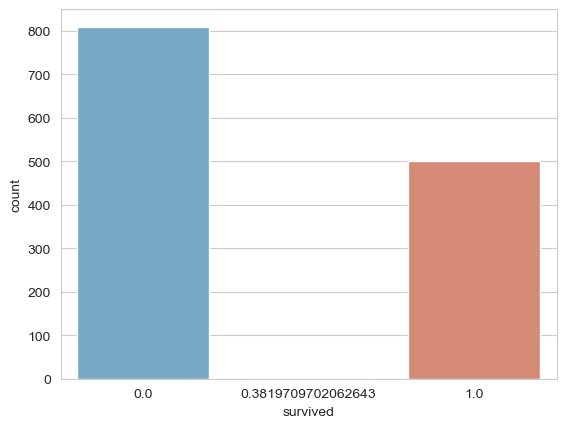

In [16]:
# Set the plotting style to whitegrid for seaborn
# Display the plot
sns.set_style('whitegrid')
sns.countplot(x='survived',data=df_1,palette='RdBu_r')

<Axes: xlabel='survived', ylabel='count'>

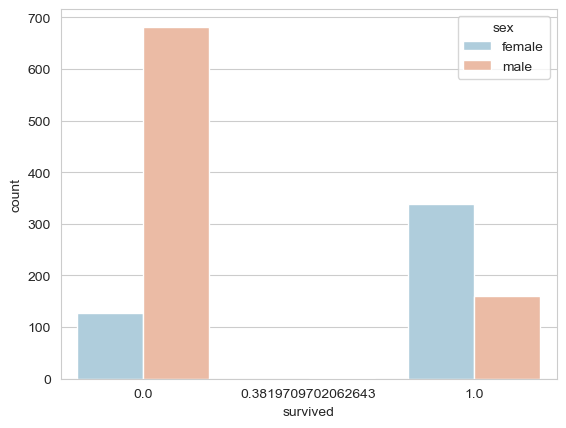

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='sex',data=df_1,palette='RdBu_r')

<Axes: xlabel='survived', ylabel='count'>

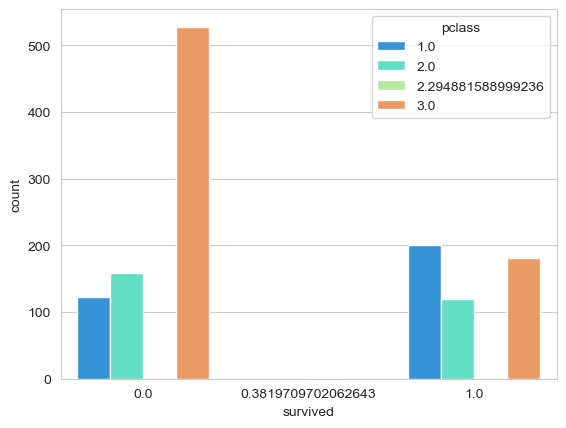

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='pclass',data=df_1,palette='rainbow')

<Axes: >

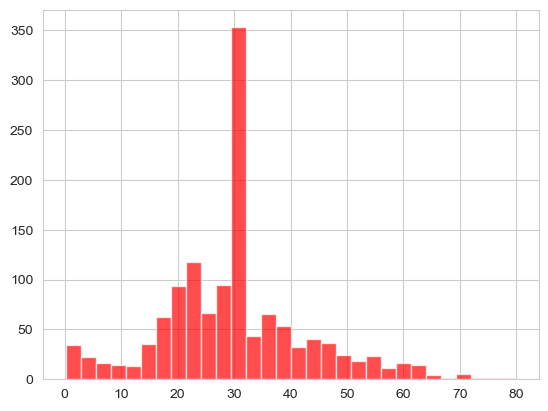

In [19]:
df_1['age'].hist(bins=30,color='red',alpha=0.7)

<Axes: xlabel='sibsp', ylabel='count'>

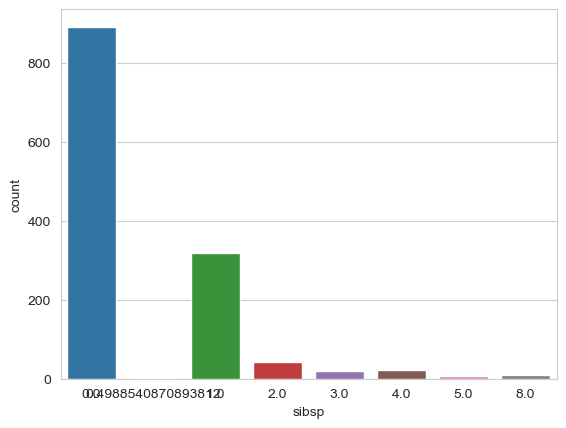

In [20]:
sns.countplot(x='sibsp',data=df_1)

<Axes: xlabel='parch', ylabel='count'>

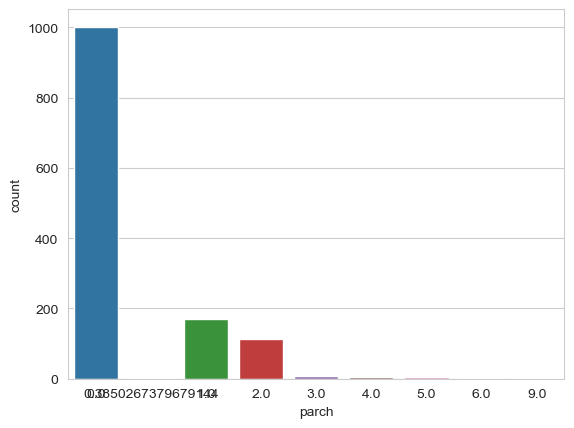

In [21]:
sns.countplot(x='parch',data=df_1)

<Axes: >

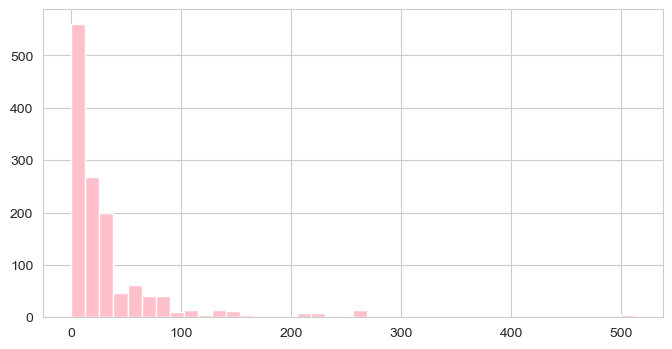

In [22]:
df_1['fare'].hist(color='pink',bins=40,figsize=(8,4))

In [23]:
sex = pd.get_dummies(df_1['sex'],drop_first=True)
embark = pd.get_dummies(df_1['embarked'],drop_first=True)

In [24]:
df_1.drop(['sex','embarked','name','ticket'],axis=1,inplace=True)

In [25]:
df_1 = pd.concat([df_1,sex,embark],axis=1)

In [26]:
df_1.head(5)

,pclass,survived,age,sibsp,parch,fare,male,Q,S
0,1.0,1.0,29.0000,0.0,0.0,211.3375,False,False,True
1,1.0,1.0,0.9167,1.0,2.0,151.5500,True,False,True
2,1.0,0.0,2.0000,1.0,2.0,151.5500,False,False,True
3,1.0,0.0,30.0000,1.0,2.0,151.5500,True,False,True
4,1.0,0.0,25.0000,1.0,2.0,151.5500,False,False,True


In [27]:
#information of dataset cleaned
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1310 non-null   float64
 1   survived  1310 non-null   float64
 2   age       1310 non-null   float64
 3   sibsp     1310 non-null   float64
 4   parch     1310 non-null   float64
 5   fare      1310 non-null   float64
 6   male      1310 non-null   bool   
 7   Q         1310 non-null   bool   
 8   S         1310 non-null   bool   
dtypes: bool(3), float64(6)
memory usage: 65.4 KB


In [28]:
#initial insights into  numerical data 
df_1.describe()

,pclass,survived,age,sibsp,parch,fare
count,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837516,0.485869,12.878277,1.041260,0.865230,51.719113
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [29]:
df_1.head()

,pclass,survived,age,sibsp,parch,fare,male,Q,S
0,1.0,1.0,29.0000,0.0,0.0,211.3375,False,False,True
1,1.0,1.0,0.9167,1.0,2.0,151.5500,True,False,True
2,1.0,0.0,2.0000,1.0,2.0,151.5500,False,False,True
3,1.0,0.0,30.0000,1.0,2.0,151.5500,True,False,True
4,1.0,0.0,25.0000,1.0,2.0,151.5500,False,False,True


array([[<Axes: title={'center': 'pclass'}>,
        <Axes: title={'center': 'survived'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sibsp'}>],
       [<Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

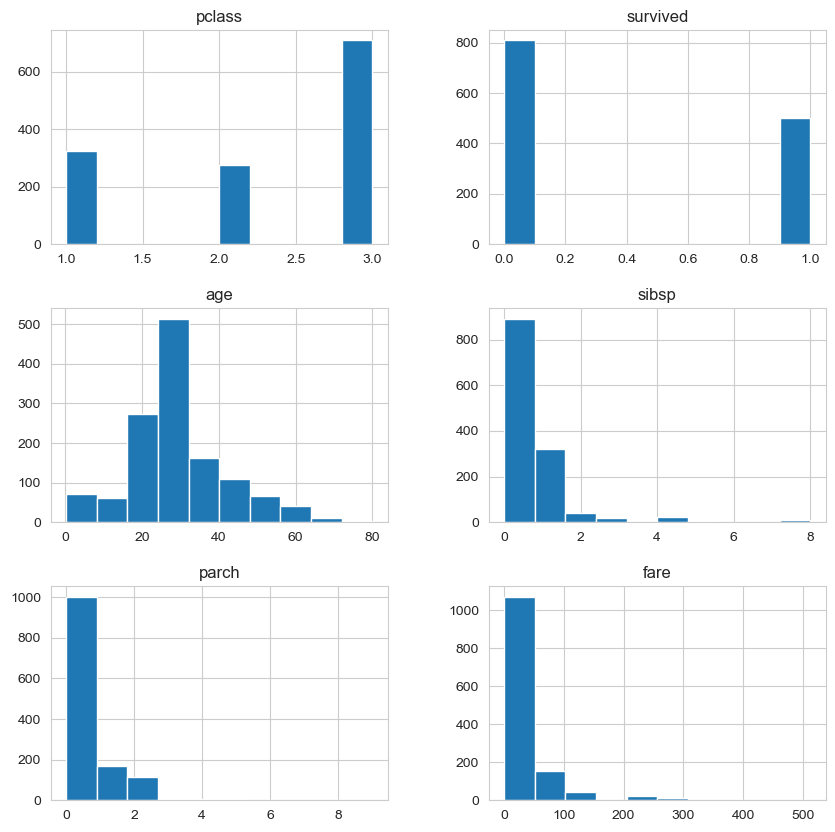

In [32]:
df_1.hist(figsize=(10,10))

In [49]:
import numpy as np 
# Identify non-numeric columns
non_numeric_cols = df_1.select_dtypes(exclude=[np.number]).columns

# Drop non-numeric columns or exclude them from correlation analysis
numeric_df = df_1.drop(columns=non_numeric_cols)

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
            pclass  survived       age     sibsp     parch      fare  \
pclass    1.000000 -0.312469 -0.366370  0.060832  0.018322 -0.558477   
survived -0.312469  1.000000 -0.050199 -0.027825  0.082660  0.244208   
age      -0.366370 -0.050199  1.000000 -0.190747 -0.130872  0.171521   
sibsp     0.060832 -0.027825 -0.190747  1.000000  0.373587  0.160224   
parch     0.018322  0.082660 -0.130872  0.373587  1.000000  0.221522   
fare     -0.558477  0.244208  0.171521  0.160224  0.221522  1.000000   
male      0.124590 -0.528582  0.057386 -0.109586 -0.213081 -0.185445   
Q         0.230482 -0.016071 -0.012718 -0.048676 -0.100939 -0.130049   
S         0.091305 -0.150517 -0.059143  0.073697  0.071869 -0.169866   

              male         Q         S  
pclass    0.124590  0.230482  0.091305  
survived -0.528582 -0.016071 -0.150517  
age       0.057386 -0.012718 -0.059143  
sibsp    -0.109586 -0.048676  0.073697  
parch    -0.213081 -0.100939  0.071869  
fare     -0.1

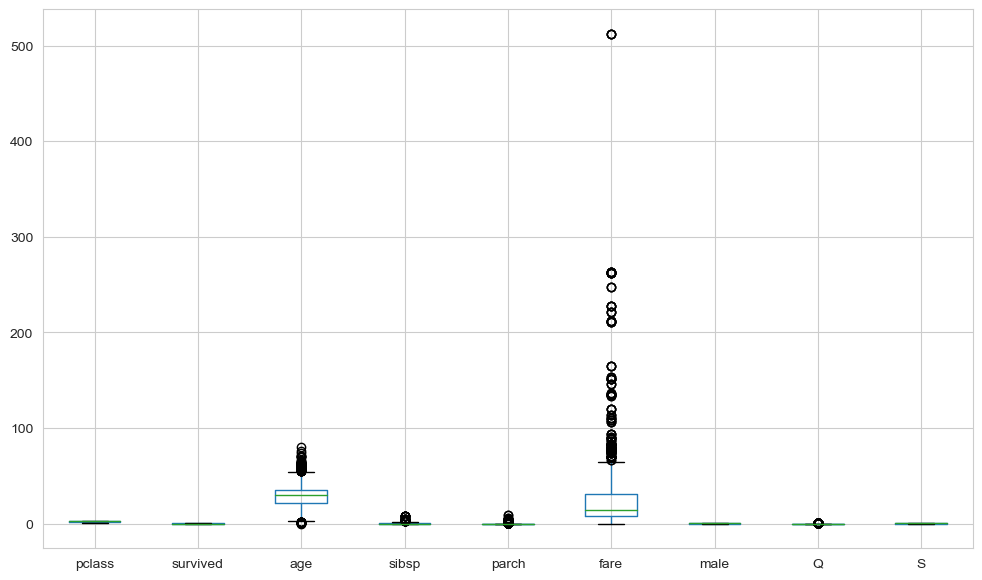

In [34]:
#disply boxplot
plt.figure(figsize=(12, 7))
df_1.boxplot()
plt.show()

In [35]:
# Convert boolean columns to integers
df_1['male'] = df_1['male'].astype(int)
df_1['Q'] = df_1['Q'].astype(int)
df_1['S'] = df_1['S'].astype(int)

In [36]:
# Verify the DataFrame
print("\nDataFrame after conversion and imputation:")
print(df_1)


DataFrame after conversion and imputation:
        pclass  survived        age     sibsp     parch        fare  male  Q  \
0     1.000000  1.000000  29.000000  0.000000  0.000000  211.337500     0  0   
1     1.000000  1.000000   0.916700  1.000000  2.000000  151.550000     1  0   
2     1.000000  0.000000   2.000000  1.000000  2.000000  151.550000     0  0   
3     1.000000  0.000000  30.000000  1.000000  2.000000  151.550000     1  0   
4     1.000000  0.000000  25.000000  1.000000  2.000000  151.550000     0  0   
...        ...       ...        ...       ...       ...         ...   ... ..   
1305  3.000000  0.000000  29.881135  1.000000  0.000000   14.454200     0  0   
1306  3.000000  0.000000  26.500000  0.000000  0.000000    7.225000     1  0   
1307  3.000000  0.000000  27.000000  0.000000  0.000000    7.225000     1  0   
1308  3.000000  0.000000  29.000000  0.000000  0.000000    7.875000     1  0   
1309  2.294882  0.381971  29.881135  0.498854  0.385027   33.295479     1  0

In [37]:
df_1.head(5)

,pclass,survived,age,sibsp,parch,fare,male,Q,S
0,1.0,1.0,29.0000,0.0,0.0,211.3375,0,0,1
1,1.0,1.0,0.9167,1.0,2.0,151.5500,1,0,1
2,1.0,0.0,2.0000,1.0,2.0,151.5500,0,0,1
3,1.0,0.0,30.0000,1.0,2.0,151.5500,1,0,1
4,1.0,0.0,25.0000,1.0,2.0,151.5500,0,0,1


In [38]:
# Check if DataFrame is empty
if df_1.empty:
    print("DataFrame is empty!")
else:
    print("DataFrame is not empty. Proceeding with train-test split.")

DataFrame is not empty. Proceeding with train-test split.


In [39]:
# Train-test split
X = df_1.drop(['survived'], axis=1)  # Features
y = df_1['survived']  # Target variable

In [40]:
# Ensure target variable is integer
y = y.astype('int')

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [42]:
# Initialize and train Logistic Regression model
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)


C:\Users\abass\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
# Predictions
predictions = logmodel.predict(X_test)
print("Predictions:", predictions)

Predictions: [0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1
 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1
 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0
 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0]


In [44]:
X_test.head()

,pclass,age,sibsp,parch,fare,male,Q,S
996,3.0,33.000000,0.0,0.0,7.8958,1,0,1
254,1.0,29.881135,0.0,0.0,30.5000,1,0,1
583,2.0,40.000000,0.0,0.0,15.7500,0,0,1
568,2.0,18.500000,0.0,0.0,13.0000,1,0,1
483,2.0,29.881135,0.0,0.0,33.0000,0,0,1


In [45]:
# Initialize and train the model
rf= RandomForestClassifier(n_estimators=500)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [50]:
from sklearn.metrics import confusion_matrix
rf_pre=rf.predict(X_test)
print(confusion_matrix(y_test,rf_pre))

[[57 16]
 [14 44]]


In [51]:
print(classification_report(y_test,rf_pre))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        73
           1       0.73      0.76      0.75        58

    accuracy                           0.77       131
   macro avg       0.77      0.77      0.77       131
weighted avg       0.77      0.77      0.77       131



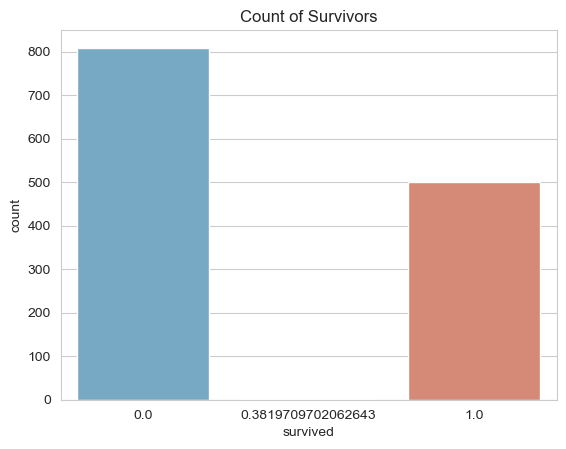

In [52]:

# Plotting the count of survivors
sns.set_style('whitegrid')
sns.countplot(x='survived', data=df_1, palette='RdBu_r')
plt.title('Count of Survivors')
plt.show()

In [53]:
# Sample new data
new_data = pd.DataFrame({
    'pclass': [1.0, 2.0],
    'age': [30, 45],
    'sibsp': [1.0, 0.0],
    'parch': [2.0, 1.0],
    'fare': [150.0, 75.0],
    'male': [0, 1],
    'Q': [0, 1],
    'S': [1, 0]
})

# Standardize the numerical features in the new data
scaler = StandardScaler()
scaler.fit(X_train[['age', 'fare']])
new_data[['age', 'fare']] = scaler.transform(new_data[['age', 'fare']])

# Predict the survival for new data
new_predictions = rf.predict(new_data)
print('Predictions for new data:', new_predictions)

Predictions for new data: [1 1]
